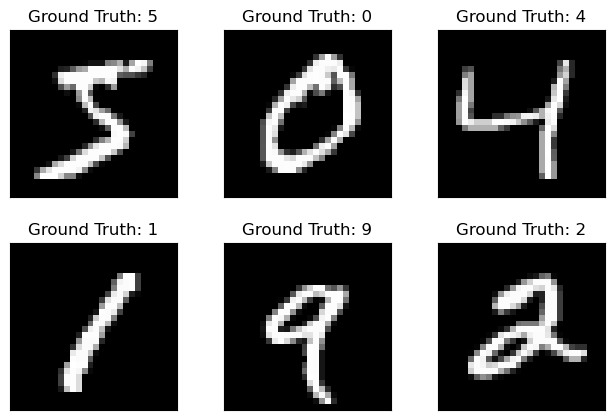


Test set: Average loss: 0.0362, Accuracy: 1025/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302443
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.271644
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.302001
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.303563
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.264771
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.264580
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.265329
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.262941
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.253209
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.216950
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.248389
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.233880
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.213626
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.194292
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.189583
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.158508
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.160231
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.117514
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.098966
Train Epoch: 1 [12

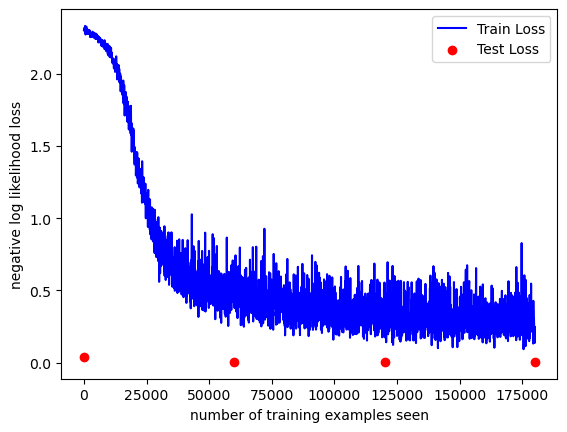

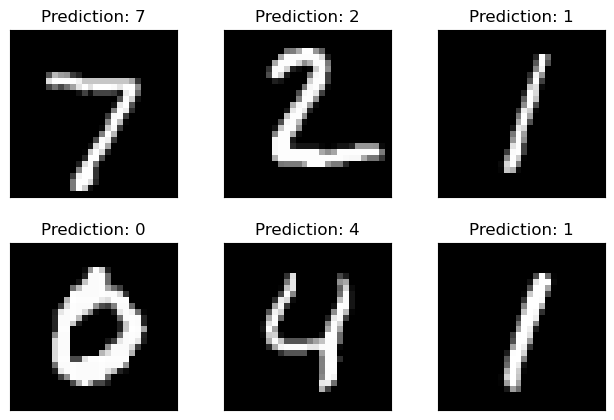

In [4]:
# Import necessary libraries for deep learning and visualization
from __future__ import print_function
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Setting up parameters for the training process
n_epochs = 3  # Number of epochs to train the model
batch_size = 64  # Size of the batches used in training
lr = 0.01  # Learning rate for optimizer
momentum = 0.5  # Momentum used in optimizer

# Loading MNIST dataset for both training and testing
train_dataset = datasets.MNIST(root='./mnist_data/',  
                               train=True,  
                               transform=transforms.ToTensor(),  
                               download=True)  

test_dataset = datasets.MNIST(root='./mnist_data/',  
                              train=False,  
                              transform=transforms.ToTensor())  

# DataLoader wraps an iterable around the Dataset to enable easy access to the samples
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)  

# Visualizing some training data
fig1 = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    example_data, example_label = train_dataset[i]  
    plt.imshow(example_data.squeeze().numpy(), cmap='gray', interpolation='none')  
    plt.title("Ground Truth: {}".format(example_label))  
    plt.xticks([])  
    plt.yticks([])  

plt.show()  # Corrected to plt.show() to properly display the figure

# Defining the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 128)  
        self.l2 = nn.Linear(128, 64)  
        self.l3 = nn.Linear(64, 10)  

    def forward(self, x):
        x = x.view(-1, 784)  
        x = F.relu(self.l1(x))  
        x = F.relu(self.l2(x))  
        return self.l3(x)  

model = Net()  

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)  

# Lists for tracking progress
train_losses = []  
train_counter = []  
test_losses = []  
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]  

# Training function
def train(epoch):
    model.train()  
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)  
        optimizer.zero_grad()  
        output = model(data)  
        loss = criterion(output, target)  
        loss.backward()  
        optimizer.step()  
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100. * batch_idx / len(train_loader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

# Testing function
def test():
    model.eval()  
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        with torch.no_grad():  
            output = model(data)  
            test_loss += criterion(output, target).item()  
            pred = output.data.max(1, keepdim=True)[1]  
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()  
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
       test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

test()  # Run an initial test to establish baseline performance

# Main training and testing loop
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

# Plot training and testing losses
plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()  # Corrected plt.show()

# Visualize testing data with predictions
fig3 = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    example_data, example_label = test_dataset[i]
    plt.imshow(example_data.squeeze().numpy(), cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(example_label))
    plt.xticks([])
    plt.yticks([])

plt.show()  # Corrected plt.show()